# LAB 1 - Marley Akonnor

Research Question: How can we recommend the best salary (totalpay or schoolpay – your choice) for our next head football coach?

##Import Required Packages

In [150]:
#Import appropriate libraries for analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

##Import and cleaning of the datasets:

In [89]:
#Import the coaches dataset
coaches_df = pd.read_csv('/Users/m/Documents/M.S Syracuse Data Science/Courses/IST 718 -  Big Data Analytics/Labs/Coaches9.csv')
coaches_df.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [90]:
#Clean the dataset by removing superfluous columns
coaches_df = coaches_df.drop(columns =['Bonus', 'Buyout', 'AssistantPay'])

In [91]:
#Continues data cleaning:
#Utilize a function by Allen Flores to expedite data cleaning. 
#This function removes commas, dollar signs, and extra spaces. Use this function on the appropriate columns

def convert2num(data_column):
    col = data_column.str.replace(',','')
    col = col.str.replace('$','')
    col = col.str.replace(" ","")
    col = col.str.replace("--","0")
    col = col.fillna(0)
    col = col.astype(float)
    return col

coaches_df['SchoolPay'] = convert2num(coaches_df['SchoolPay'])
coaches_df['TotalPay'] = convert2num(coaches_df['TotalPay'])
coaches_df['BonusPaid'] = convert2num(coaches_df['BonusPaid'])

coaches_df.head()

<ipython-input-91-33db4cb2753b>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  col = col.str.replace('$','')


,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,0.0
1,Akron,MAC,Terry Bowden,411000.0,412500.0,50000.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,500000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,165471.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,145000.0


In [92]:
#Import the stadium dataset
#Use the converter function on the Capacity column
#Change the "College" column name to "School" in preparation for the merge
stadium_df = pd.read_csv('/Users/m/Documents/M.S Syracuse Data Science/Courses/IST 718 -  Big Data Analytics/Labs/Stadium_Size.csv')
stadium_df['Capacity'] = convert2num(stadium_df['Capacity'])
stadium_df.rename(columns={'College':'School'}, inplace=True)
stadium_df.head(5)

<ipython-input-91-33db4cb2753b>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  col = col.str.replace('$','')


,Stadium,School,Conference,Capacity,Opened
0,Michigan Stadium,Michigan,Big Ten,107601.0,1927
1,Beaver Stadium,Penn State,Big Ten,106572.0,1960
2,Ohio Stadium,Ohio State,Big Ten,104944.0,1922
3,Kyle Field,Texas A&M,SEC,102733.0,1904
4,Neyland Stadium,Tennessee,SEC,102521.0,1921


In [93]:
#Import the revenue dataset
#Use the converter function on the "Revenue" and "Expenses" column
#Rename "RK" to "Rank" for clarity
revenue_df = pd.read_csv('/Users/m/Documents/M.S Syracuse Data Science/Courses/IST 718 -  Big Data Analytics/Labs/revenue.csv')
revenue_df['Revenue'] = convert2num(revenue_df['Revenue'])
revenue_df['Expenses'] = convert2num(revenue_df['Expenses'])
revenue_df.rename(columns={'RK':'Rank'}, inplace=True)
revenue_df.head(5)

<ipython-input-91-33db4cb2753b>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  col = col.str.replace('$','')


,Rank,School,Conference,Revenue,Expenses
0,1,Texas,Big 12,223879781.0,204234897.0
1,2,Texas A&M,SEC,212748002.0,169012456.0
2,3,Ohio State,Big Ten,210548239.0,220572956.0
3,4,Michigan,Big Ten,197820410.0,190952175.0
4,5,Georgia,SEC,174042482.0,143299554.0


In [94]:
#Import the Graduation Rates dataset
#Use the converter function on the "gsr" and "fgr" column
#Change the "school" column name to "School" in preparation for the merge
gradrate_df = pd.read_csv('/Users/m/Documents/M.S Syracuse Data Science/Courses/IST 718 -  Big Data Analytics/Labs/grad_rates.csv')
gradrate_df.rename(columns={'school':'School'}, inplace=True)
gradrate_df.head(10)

,x,School,conf,sport,state,gsr,fgr,Unnamed: 7
0,2012,Abilene Christian,Southland Conference,Football,TX,70,47.0,NaN
1,2012,Akron,Mid-American Conference,Football,OH,75,61.0,NaN
2,2012,Alabama A&M,Southwestern Athletic Conf.,Football,AL,59,49.0,NaN
3,2012,Alabama State,Southwestern Athletic Conf.,Football,AL,58,39.0,NaN
4,2012,Alabama,Southeastern Conference,Football,AL,85,65.0,NaN
5,2012,Alabama at Birmingham,Conference USA,Football,AL,71,51.0,NaN
6,2012,University at Albany,Colonial Athletic Association,Football,NY,88,63.0,NaN
7,2012,Alcorn State,Southwestern Athletic Conf.,Football,MS,58,40.0,NaN
8,2012,Appalachian State,Sun Belt Conference,Football,NC,75,67.0,NaN
9,2012,Arizona State,Pac-12 Conference,Football,AZ,75,60.0,NaN


In [95]:
#Merge the datafames together
#Begin by merging the Coaches data with the Stadium data and then merge Revenue and the grauation rate
mergeUno = coaches_df.merge(stadium_df, on='School', how='left')
mergeDos = mergeUno.merge(revenue_df, on='School', how='left')
coaches_comp = mergeDos.merge(gradrate_df, on='School', how='left')
coaches_comp.head(10)

,School,Conference_x,Coach,SchoolPay,TotalPay,BonusPaid,Stadium,Conference_y,Capacity,Opened,...,Conference,Revenue,Expenses,x,conf,sport,state,gsr,fgr,Unnamed: 7
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,0.0,Falcon Stadium,Mountain West,52237.0,1962.0,...,Mt. West,60009782.0,54192115.0,2012.0,Mountain West Conference,Football,CO,80.0,NaN,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,50000.0,InfoCision Stadium,MAC,30000.0,2009.0,...,MAC,37194485.0,37275978.0,2012.0,Mid-American Conference,Football,OH,75.0,61.0,NaN
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,500000.0,Bryant Denny Stadium,SEC,101821.0,1929.0,...,SEC,164090889.0,185317681.0,2012.0,Southeastern Conference,Football,AL,85.0,65.0,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,165471.0,NaN,NaN,NaN,NaN,...,C-USA,36494381.0,35697117.0,2012.0,Conference USA,Football,AL,71.0,51.0,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,145000.0,Kidd Brewer Stadium,Sun Belt,24150.0,1962.0,...,Sun Belt,37996512.0,37773447.0,2012.0,Sun Belt Conference,Football,NC,75.0,67.0,NaN
5,Arizona,Pac-12,Kevin Sumlin,1600000.0,2000000.0,0.0,Arizona Stadium,Pac 12,56037.0,1928.0,...,Pac-12,105091389.0,100565835.0,2012.0,Pac-12 Conference,Football,AZ,76.0,58.0,NaN
6,Arizona State,Pac-12,Herm Edwards,2000000.0,2000000.0,0.0,Sun Devil Stadium,Pac 12,56232.0,1958.0,...,Pac-12,121698840.0,118404377.0,2012.0,Pac-12 Conference,Football,AZ,75.0,60.0,NaN
7,Arizona State,Pac-12,Herm Edwards,2000000.0,2000000.0,0.0,Sun Devil Stadium,Pac 12,56232.0,1958.0,...,Pac-12,121698840.0,118404377.0,2012.0,Sun Belt Conference,Football,AR,80.0,62.0,NaN
8,Arkansas,SEC,Chad Morris,3500000.0,3500000.0,0.0,Razorback Stadium,SEC,72000.0,1938.0,...,SEC,137497788.0,129620361.0,2012.0,Southeastern Conference,Football,AR,67.0,47.0,NaN
9,Arkansas State,Sun Belt,Blake Anderson,825000.0,825000.0,25000.0,Centennial Bank Stadium,Sun Belt,30964.0,2002.0,...,Sun Belt,35550592.0,35550592.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#Next remove extraneous columns
coaches_comp = coaches_comp.drop(['Stadium','Conference_y', 'Opened', 'Conference', 'x', 'conf', 'sport', 'Unnamed: 7'], axis=1)

#Rename conference
coaches_comp.rename(columns={'Conference_x':'Conference'}, inplace=True)
coaches_comp.head(10)

,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid,Capacity,Rank,Revenue,Expenses,state,gsr,fgr
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,0.0,52237.0,57.0,60009782.0,54192115.0,CO,80.0,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,50000.0,30000.0,84.0,37194485.0,37275978.0,OH,75.0,61.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,500000.0,101821.0,7.0,164090889.0,185317681.0,AL,85.0,65.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,165471.0,NaN,86.0,36494381.0,35697117.0,AL,71.0,51.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,145000.0,24150.0,81.0,37996512.0,37773447.0,NC,75.0,67.0
5,Arizona,Pac-12,Kevin Sumlin,1600000.0,2000000.0,0.0,56037.0,38.0,105091389.0,100565835.0,AZ,76.0,58.0
6,Arizona State,Pac-12,Herm Edwards,2000000.0,2000000.0,0.0,56232.0,27.0,121698840.0,118404377.0,AZ,75.0,60.0
7,Arizona State,Pac-12,Herm Edwards,2000000.0,2000000.0,0.0,56232.0,27.0,121698840.0,118404377.0,AR,80.0,62.0
8,Arkansas,SEC,Chad Morris,3500000.0,3500000.0,0.0,72000.0,20.0,137497788.0,129620361.0,AR,67.0,47.0
9,Arkansas State,Sun Belt,Blake Anderson,825000.0,825000.0,25000.0,30964.0,92.0,35550592.0,35550592.0,NaN,NaN,NaN


In [97]:
#Get an understanding of what types are in the dataset for classification, linear or logistic regression
coaches_comp.dtypes

School         object
Conference     object
Coach          object
SchoolPay     float64
TotalPay      float64
BonusPaid     float64
Capacity      float64
Rank          float64
Revenue       float64
Expenses      float64
state          object
gsr           float64
fgr           float64
dtype: object

In [98]:
#Convert "Conference" and "Rank" to categorical
coaches_comp['Conference'] = coaches_comp.Conference.astype('category')
coaches_comp['Rank'] = coaches_comp.Rank.astype('category')

##Check for missing values:

In [99]:
#Check for null values in the dataframe
null_check = coaches_comp.isnull().values.any()
tot_null = coaches_comp.isnull().sum()
print(null_check)
print(tot_null)

True
School         0
Conference     0
Coach          0
SchoolPay      0
TotalPay       0
BonusPaid      0
Capacity      15
Rank          20
Revenue       20
Expenses      20
state          5
gsr            5
fgr            7
dtype: int64


In [100]:
#Colleges missing TotalPay
coaches_comp.loc[coaches_comp['TotalPay'] == 0]

,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid,Capacity,Rank,Revenue,Expenses,state,gsr,fgr
13,Baylor,Big 12,Matt Rhule,0.0,0.0,0.0,45140.0,NaN,NaN,NaN,TX,90.0,61.0
17,Brigham Young,Ind.,Kalani Sitake,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT,64.0,43.0
92,Rice,C-USA,Mike Bloomgren,0.0,0.0,0.0,47000.0,NaN,NaN,NaN,TX,87.0,80.0
100,Southern Methodist,AAC,Sonny Dykes,0.0,0.0,0.0,NaN,NaN,NaN,NaN,TX,72.0,63.0


In [101]:
#Colleges missing Stadium Capacity
coaches_comp[coaches_comp['Capacity'].isna()]

,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid,Capacity,Rank,Revenue,Expenses,state,gsr,fgr
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,165471.0,NaN,86.0,36494381.0,35697117.0,AL,71.0,51.0
17,Brigham Young,Ind.,Kalani Sitake,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT,64.0,43.0
22,Charlotte,C-USA,Brad Lambert,625000.0,625000.0,0.0,NaN,76.0,40866430.0,38454232.0,NC,80.0,NaN
51,Liberty,Ind.,Turner Gill,947281.0,947281.0,0.0,NaN,NaN,NaN,NaN,VA,67.0,65.0
59,Massachusetts,Ind.,Mark Whipple,500000.0,500000.0,20000.0,NaN,67.0,49461013.0,48445234.0,MA,68.0,51.0
61,Miami (Fla.),ACC,Mark Richt,4058061.0,4058061.0,0.0,NaN,NaN,NaN,NaN,FL,81.0,50.0
62,Miami (Ohio),MAC,Chuck Martin,524826.0,524826.0,12669.0,NaN,79.0,39644248.0,38650630.0,OH,89.0,77.0
73,Nevada-Las Vegas,Mt. West,Tony Sanchez,600000.0,600000.0,0.0,NaN,64.0,50784275.0,50445250.0,NV,63.0,60.0
77,North Carolina State,ACC,Dave Doeren,3000000.0,3000000.0,275000.0,NaN,47.0,92724548.0,90100025.0,NC,71.0,54.0
99,Southern California,Pac-12,Clay Helton,2625965.0,2625965.0,0.0,NaN,NaN,NaN,NaN,CA,82.0,62.0


In [102]:
#Colleges missing Revenue
coaches_comp[coaches_comp['Revenue'].isna()]

,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid,Capacity,Rank,Revenue,Expenses,state,gsr,fgr
10,Army,Ind.,Jeff Monken,932521.0,932521.0,0.0,38000.0,NaN,NaN,NaN,NaN,NaN,NaN
13,Baylor,Big 12,Matt Rhule,0.0,0.0,0.0,45140.0,NaN,NaN,NaN,TX,90.0,61.0
15,Boston College,ACC,Steve Addazio,2514859.0,2514859.0,0.0,44500.0,NaN,NaN,NaN,MA,90.0,81.0
17,Brigham Young,Ind.,Kalani Sitake,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT,64.0,43.0
29,Duke,ACC,David Cutcliffe,2540928.0,2540928.0,0.0,40004.0,NaN,NaN,NaN,NC,96.0,90.0
51,Liberty,Ind.,Turner Gill,947281.0,947281.0,0.0,NaN,NaN,NaN,NaN,VA,67.0,65.0
61,Miami (Fla.),ACC,Mark Richt,4058061.0,4058061.0,0.0,NaN,NaN,NaN,NaN,FL,81.0,50.0
70,Navy,AAC,Ken Niumatalolo,2163000.0,2163000.0,0.0,34000.0,NaN,NaN,NaN,NaN,NaN,NaN
80,Northwestern,Big Ten,Pat Fitzgerald,3619775.0,3619775.0,0.0,47130.0,NaN,NaN,NaN,IL,100.0,93.0
81,Notre Dame,Ind.,Brian Kelly,2129638.0,2129638.0,0.0,77622.0,NaN,NaN,NaN,IN,92.0,84.0


In [103]:
#Colleges missing Expenses
coaches_comp[coaches_comp['Expenses'].isna()]

,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid,Capacity,Rank,Revenue,Expenses,state,gsr,fgr
10,Army,Ind.,Jeff Monken,932521.0,932521.0,0.0,38000.0,NaN,NaN,NaN,NaN,NaN,NaN
13,Baylor,Big 12,Matt Rhule,0.0,0.0,0.0,45140.0,NaN,NaN,NaN,TX,90.0,61.0
15,Boston College,ACC,Steve Addazio,2514859.0,2514859.0,0.0,44500.0,NaN,NaN,NaN,MA,90.0,81.0
17,Brigham Young,Ind.,Kalani Sitake,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT,64.0,43.0
29,Duke,ACC,David Cutcliffe,2540928.0,2540928.0,0.0,40004.0,NaN,NaN,NaN,NC,96.0,90.0
51,Liberty,Ind.,Turner Gill,947281.0,947281.0,0.0,NaN,NaN,NaN,NaN,VA,67.0,65.0
61,Miami (Fla.),ACC,Mark Richt,4058061.0,4058061.0,0.0,NaN,NaN,NaN,NaN,FL,81.0,50.0
70,Navy,AAC,Ken Niumatalolo,2163000.0,2163000.0,0.0,34000.0,NaN,NaN,NaN,NaN,NaN,NaN
80,Northwestern,Big Ten,Pat Fitzgerald,3619775.0,3619775.0,0.0,47130.0,NaN,NaN,NaN,IL,100.0,93.0
81,Notre Dame,Ind.,Brian Kelly,2129638.0,2129638.0,0.0,77622.0,NaN,NaN,NaN,IN,92.0,84.0


In [104]:
#Colleges missing Federal Graduation Rate
coaches_comp[coaches_comp['fgr'].isna()]

,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid,Capacity,Rank,Revenue,Expenses,state,gsr,fgr
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,0.0,52237.0,57.0,60009782.0,54192115.0,CO,80.0,NaN
9,Arkansas State,Sun Belt,Blake Anderson,825000.0,825000.0,25000.0,30964.0,92.0,35550592.0,35550592.0,NaN,NaN,NaN
10,Army,Ind.,Jeff Monken,932521.0,932521.0,0.0,38000.0,NaN,NaN,NaN,NaN,NaN,NaN
22,Charlotte,C-USA,Brad Lambert,625000.0,625000.0,0.0,NaN,76.0,40866430.0,38454232.0,NC,80.0,NaN
26,Colorado,Pac-12,Mike MacIntyre,2878500.0,2878500.0,297000.0,53750.0,46.0,94935198.0,98413284.0,NaN,NaN,NaN
54,Louisiana-Monroe,Sun Belt,Matt Viator,390000.0,390000.0,0.0,30427.0,178.0,15568952.0,16927856.0,NaN,NaN,NaN
70,Navy,AAC,Ken Niumatalolo,2163000.0,2163000.0,0.0,34000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#Colleges missing Graduate Success Rate
coaches_comp[coaches_comp['gsr'].isna()]

,School,Conference,Coach,SchoolPay,TotalPay,BonusPaid,Capacity,Rank,Revenue,Expenses,state,gsr,fgr
9,Arkansas State,Sun Belt,Blake Anderson,825000.0,825000.0,25000.0,30964.0,92.0,35550592.0,35550592.0,NaN,NaN,NaN
10,Army,Ind.,Jeff Monken,932521.0,932521.0,0.0,38000.0,NaN,NaN,NaN,NaN,NaN,NaN
26,Colorado,Pac-12,Mike MacIntyre,2878500.0,2878500.0,297000.0,53750.0,46.0,94935198.0,98413284.0,NaN,NaN,NaN
54,Louisiana-Monroe,Sun Belt,Matt Viator,390000.0,390000.0,0.0,30427.0,178.0,15568952.0,16927856.0,NaN,NaN,NaN
70,Navy,AAC,Ken Niumatalolo,2163000.0,2163000.0,0.0,34000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
#Do a final clean of the coaches complete dataset 
# Drop all schools with 0 TotalPay
coaches_comp = coaches_comp.drop(coaches_comp.index[coaches_comp.TotalPay == 0])
# Drop GSR null
coaches_comp = coaches_comp.dropna(axis=0, subset=['gsr'])
# Drop missing Stadium Capacity
coaches_comp = coaches_comp.dropna(axis=0, subset=['Capacity'])
# Drop missing Revenue
coaches_comp = coaches_comp.dropna(axis=0, subset=['Expenses'])
# Drop missing Expenses
coaches_comp = coaches_comp.dropna(axis=0, subset=['Revenue'])
print('The number of observations in the data set is:',len(coaches_comp))

The number of observations in the data set is: 98


##Data Exploration:

In [125]:
#Summarize the data
coaches_comp.describe()

,SchoolPay,TotalPay,BonusPaid,Capacity,Revenue,Expenses,gsr,fgr
count,9.800000e+01,9.800000e+01,9.800000e+01,98.000000,9.800000e+01,9.800000e+01,98.00000,97.000000
mean,2.543377e+06,2.552000e+06,1.258214e+05,53311.846939,8.881076e+07,8.680718e+07,78.22449,61.474227
std,1.993359e+06,1.998053e+06,2.311458e+05,24422.421562,5.132700e+07,4.879808e+07,8.34134,9.905904
min,4.000000e+05,4.000000e+05,0.000000e+00,15000.000000,2.494847e+07,2.491091e+07,54.00000,31.000000
25%,8.036280e+05,8.068875e+05,0.000000e+00,30371.250000,3.812054e+07,3.854889e+07,73.00000,55.000000
50%,1.950004e+06,2.000000e+06,5.000000e+04,51521.000000,8.665144e+07,8.298962e+07,78.00000,62.000000
75%,3.778438e+06,3.778438e+06,1.297500e+05,66139.000000,1.277516e+08,1.265413e+08,85.00000,69.000000
max,8.307000e+06,8.307000e+06,1.350000e+06,107601.000000,2.238798e+08,2.205730e+08,95.00000,84.000000


In [126]:
#Feature Exploration
df1 = coaches_comp[['SchoolPay', 'BonusPaid', 'Capacity', 'Revenue']]
df1.head(5)

,SchoolPay,BonusPaid,Capacity,Revenue
0,885000.0,0.0,52237.0,60009782.0
1,411000.0,50000.0,30000.0,37194485.0
2,8307000.0,500000.0,101821.0,164090889.0
4,712500.0,145000.0,24150.0,37996512.0
5,1600000.0,0.0,56037.0,105091389.0


array([[<AxesSubplot:title={'center':'Capacity'}>,
        <AxesSubplot:title={'center':'Revenue'}>],
       [<AxesSubplot:title={'center':'SchoolPay'}>,
        <AxesSubplot:title={'center':'BonusPaid'}>]], dtype=object)

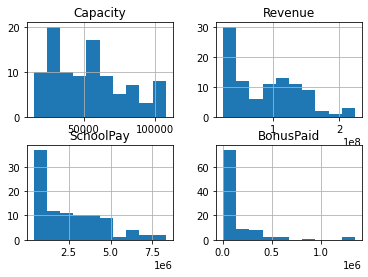

In [127]:
#Plotting the features
vis1 = df1[['Capacity', 'Revenue', 'SchoolPay', 'BonusPaid']]
vis1.hist()

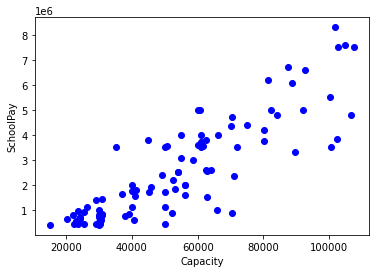

In [128]:
#Plot "Capacity" against "SchoolPay" to see relationship
plt.scatter(df1.Capacity, df1.SchoolPay,  color='blue')
plt.xlabel("Capacity")
plt.ylabel("SchoolPay")
plt.show()

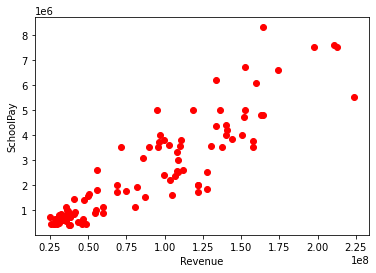

In [129]:
#Plot "Revenue" against "SchoolPay" to see relationship
plt.scatter(df1.Revenue, df1.SchoolPay,  color='red')
plt.xlabel("Revenue")
plt.ylabel("SchoolPay")
plt.show()

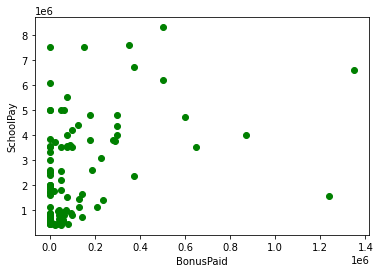

In [130]:
#Plot "BonusPaid" against "SchoolPay" to see relationship
plt.scatter(df1.BonusPaid, df1.SchoolPay,  color='green')
plt.xlabel("BonusPaid")
plt.ylabel("SchoolPay")
plt.show()

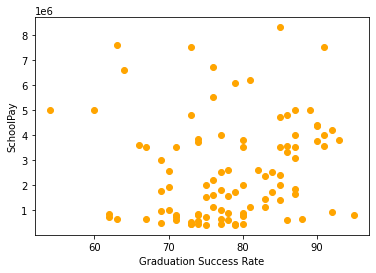

In [174]:
#Plot "gsr" against "SchoolPay" to see relationship
plt.scatter(coaches_comp.gsr, coaches_comp.SchoolPay,  color='orange')
plt.xlabel("Graduation Success Rate")
plt.ylabel("SchoolPay")
plt.show()

##Regression Models:

In [132]:
#Create new df for first model
new_df = coaches_comp[['SchoolPay', 'BonusPaid', 'Capacity', 'Revenue', 'Expenses', 'gsr']]

In [158]:
#Create new df2 for second model
new_df2 = coaches_comp[['SchoolPay', 'Capacity', 'Revenue', 'Expenses', 'gsr']]

In [133]:
#Separate predictor variables in X
X=new_df[['BonusPaid', 'Capacity', 'Revenue', 'Expenses', 'gsr']]

In [134]:
#Put variable for prediction in Y
Y=new_df['SchoolPay']

In [135]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [136]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [137]:
#Print the coefficients and intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 1.04315387e+00  2.32735435e+01  2.02331230e-02  3.76234311e-03
 -2.39248569e+03]
Intercept:  -761878.3721777261


##Prediction

In [138]:
y_pred=regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
#Display summary statistics for regression
print("Mean absolute error : " + str(mae))
print("Mean squared error : " + str(mse))
print("r2_score : " + str(score))

Mean absolute error : 565661.8126893027
Mean squared error : 589858918954.0946
r2_score : 0.8542541751117876


##Model 2 - Fit model for SchoolPay with Capacity, Revenue, Expenses, and GSR

In [159]:
#A model predicting School pay based on stadium capacity, revenue, expenses, and gsr
sp_model = str('SchoolPay ~ Capacity + Revenue + Expenses + gsr')

# fit the model to the training set
train_spmodel_fit = smf.ols(sp_model, data = new_df2).fit()

# summary of model fit to the training set
print(train_spmodel_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     104.6
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           1.49e-33
Time:                        19:28:00   Log-Likelihood:                -1476.6
No. Observations:                  98   AIC:                             2963.
Df Residuals:                      93   BIC:                             2976.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.158e+06   8.53e+05     -1.357      0.1

##Recommended salaray for Syracuse football head coach

In [147]:
#Syracuse Coach Salary
syr_sal = coaches_comp[coaches_comp['School'] == 'Syracuse']
regr.predict(syr_sal[['BonusPaid', 'Capacity', 'Revenue', 'Expenses', 'gsr']])

pred_syr_sal = regr.predict(syr_sal[['BonusPaid', 'Capacity', 'Revenue', 'Expenses', 'gsr']])


# print amount
print("Syracuse Coach Pay should be $",(pred_syr_sal))

Syracuse Coach Pay should be $ [2512146.28444074]


In [170]:
big10_sal = coaches_comp[coaches_comp['Conference'] == 'Big Ten']
print(big10_sal)

             School Conference           Coach  SchoolPay   TotalPay  \
43         Illinois    Big Ten     Lovie Smith  5000000.0  5000000.0   
44          Indiana    Big Ten       Tom Allen  1830000.0  1830000.0   
45             Iowa    Big Ten    Kirk Ferentz  4700000.0  4700000.0   
58         Maryland    Big Ten       DJ Durkin  2512000.0  2512000.0   
63         Michigan    Big Ten    Jim Harbaugh  7504000.0  7504000.0   
64   Michigan State    Big Ten   Mark Dantonio  4390417.0  4390417.0   
66        Minnesota    Big Ten      P.J. Fleck  3550000.0  3550000.0   
71         Nebraska    Big Ten     Scott Frost  5000000.0  5000000.0   
83       Ohio State    Big Ten     Urban Meyer  7600000.0  7600000.0   
89       Penn State    Big Ten  James Franklin  4800000.0  4800000.0   
91           Purdue    Big Ten      Jeff Brohm  3800000.0  3800000.0   
93          Rutgers    Big Ten       Chris Ash  2200000.0  2200000.0   
128       Wisconsin    Big Ten     Paul Chryst  3750000.0  37500

In [172]:
big10_sal = coaches_comp[coaches_comp['Conference'] == 'Big Ten']
regr.predict(big10_sal[['BonusPaid', 'Capacity', 'Revenue', 'Expenses', 'gsr']])

pred_big10_sal = regr.predict(big12_sal[['BonusPaid', 'Capacity', 'Revenue', 'Expenses', 'gsr']])


# print amount
print("Big 10 coach Pay should be $",(pred_big10_sal))

Big 10 coach Pay should be $ [3345206.14525936 3280972.52211641 4928729.47937244 2904503.13512768
 6402087.36025005 4242064.77713212 3329395.5712759  4389872.90866691
 6984837.20114298 5757930.42580036 3315684.1929491  2806487.65777642
 4966363.53920055]
